In [11]:
import pandas as pd
import category_encoders as ce
import numpy as np 
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

79

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  old       303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [5]:
systolic_pressure = [
  {1:123,0:116},
  {1:126,0:120},
  {1:129,0:127},
  {1:135,0:137},
  {1:142,0:144},
  {1:142,0:159},
]
df_systolic_pressure = pd.DataFrame(systolic_pressure)
df_systolic_pressure

,1,0
0,123,116
1,126,120
2,129,127
3,135,137
4,142,144
5,142,159


In [6]:
def get_trestbps_mean(age, sex):
  if age <=20:
    return df_systolic_pressure.iloc[0][sex]
  elif age >= 21 and age < 31:
    return df_systolic_pressure.iloc[1][sex]  
  elif age >= 31 and age < 41:
    return df_systolic_pressure.iloc[2][sex]      
  elif age >= 41 and age < 51:
    return df_systolic_pressure.iloc[3][sex]  
  elif age >= 51 and age < 61:
    return df_systolic_pressure.iloc[4][sex]  
  else:
    return df_systolic_pressure.iloc[5][sex]    

In [7]:
df['trestbps_mean'] = df.apply(lambda x: get_trestbps_mean(x.age,x.sex), axis = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [9]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, type_bin], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


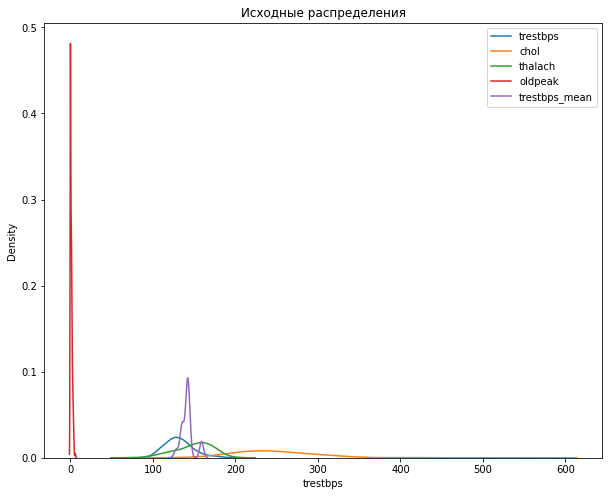

In [12]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df['chol'], ax=ax1, label ='chol')
sns.kdeplot(df['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(df['oldpeak'], ax=ax1, label ='oldpeak')
sns.kdeplot(df['trestbps_mean'], ax=ax1, label ='trestbps_mean')
plt.legend()


In [13]:
col_names = list(df.columns)

In [14]:
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

In [15]:
df_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.718028,0.763055,0.047516,-0.059432,-0.147399,0.138253,0.141398,-0.160654,0.084621,0.030536,-0.192580,0.177201,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.144941,-0.472583,0.088043,-0.116588,-0.041249,0.089621,0.036539,-0.011940,-0.107689,0.046183,-0.014356,-0.009157,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.024753,-0.047148,0.565508,0.636283,0.014240,-0.887256,-0.058633,0.070575,-0.052423,0.008741,0.152040,-0.156633,0.193087,-0.171632,-0.045686,-0.107590,0.054436,-0.073254,0.266947,-0.237760,0.002611
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.180631,0.236108,0.151343,-0.045107,-0.081851,0.021447,0.133249,-0.146576,0.058635,0.122384,-0.087472,0.025207,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.159388,0.284474,-0.050589,-0.037918,-0.012750,0.070684,0.166565,-0.174394,0.034615,-0.045340,-0.028054,0.051177,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.026790,0.071056,0.055511,0.083679,-0.060649,-0.060190,0.077405,-0.066344,-0.048305,0.105284,-0.020255,-0.033360,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.067531,-0.039955,-0.074654,0.084196,0.077859,-0.094591,-0.976386,0.901934,0.324291,-0.026958,0.100989,-0.087349,0.096607,-0.058198,-0.050897,-0.064842,0.067098,-0.013429,0.029597,-0.023012,-0.004356
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.271898,-0.247197,0.079082,0.165475,0.248317,-0.376561,-0.073953,0.101512,-0.120870,-0.056590,0.448043,-0.419627,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.019043,0.004429,-0.093384,-0.271028,-0.233863,0.469061,0.084059,-0.093776,0.042729,0.059253,-0.287606,0.257687,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.159997,0.125405,0.086959,-0.132444,-0.277513,0.280243,0.100141,-0.138486,0.168172,0.394253,-0.511356,0.310986,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946
